In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.6.4'

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Regression Problem
* Dependent variables (Charges)
* Independent variables/Features/attributes (age, sex, bmi, children, smoker, region)
* Dataset encoding(here one-hot encoding), from categorical encoding to numbered ecoding.

In [4]:
# one-hot encode for our DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# Viewing X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Creating training and test sets
from sklearn.model_selection import train_test_split

#setting the random_state so that it's consistent everytime you execute
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_insurance.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# 3. Fit the model
model_insurance.fit(X_train, y_train, epochs=100)

2022-11-08 18:15:05.169188: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-08 18:15:05.330171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 968us/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.17

In [10]:
# Checking the results of the insurance model on the test data
model_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [12]:
## If we see the ground truth of the dependent feature, it is deviated by around ~7000,
## i.e., mae and y_train.median() and y_train.mean()
## Hence we need to improve the model

## Experiment 1
* Increase the hidden units by adding an extra layer
* Change the Optimizer, from SGD to Adam.
* When tried with SGD got NAN.

In [13]:
#set the seed
tf.random.set_seed(42)
# 1. Create a Model
m1_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
m1_insurance.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
history = m1_insurance.fit(X_train, y_train, epochs=200, verbose=0)

In [14]:
#Evaluating the Experiment 1

m1_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7861 - mae: 3488.7861


[3488.7861328125, 3488.7861328125]

Text(0.5, 0, 'epochs')

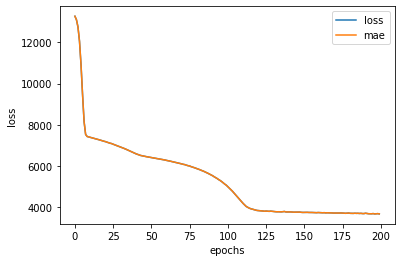

In [15]:
# Plotting the history (also known as loss curve/training curve)
# The curve plotter between "loss and epochs"

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question:** How long should you train for?
* It depends on the model you are re-working.
* Tensorflow has a solution called "EarlyStopping callback"
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

## Experiment 2
* Improving the model, and stopping the training using the Earlystopping callback strategy

In [16]:
# setting the seed
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# 1. Create a model
m2_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

m2_insurance.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

h2 = m2_insurance.fit(X_train, y_train, epochs=300, verbose=0, callbacks=[callback])

In [17]:
# Seeing how many actual epochs are run, based on the callback we have set
len(h2.history['loss'])

115

In [18]:
# Evaluating the m2 experiment
m2_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3181.1296 - mae: 3181.1296


[3181.129638671875, 3181.129638671875]

Text(0.5, 0, 'epochs')

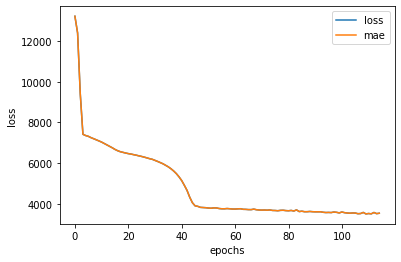

In [19]:
# Plotting the loss/training curve for m2_insurance model

pd.DataFrame(h2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data (Normalization and Standardization)

In terms of scaling values, Neural networks tend to prefer normalization

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, importing libraries from scikit-learn

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transforming training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [25]:
#Data after normalization
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [46]:
# Build a Neural network
callback2 = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=2)

# Setting the random_seed
tf.random.set_seed(42)

# 1.Create a model

m3_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
m3_insurance.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae"])

# 3. Fit the model with callback
h3 = m3_insurance.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [47]:
len(h3.history["loss"])

300

Text(0, 0.5, 'loss')

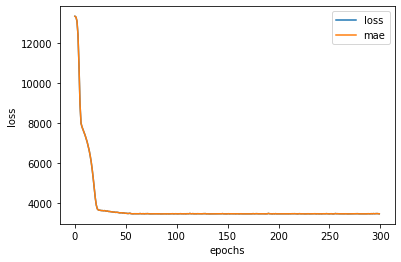

In [48]:
pd.DataFrame(h3.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


In [49]:
m3_insurance.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.8386 - mae: 3167.8386


[3167.838623046875, 3167.838623046875]